<a href="https://colab.research.google.com/github/w2j1y12/pdm17/blob/main/py-tensorflow/DL1-FCN/mnist05_FCN_test_ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DNN (Deep Neural Networks) 구현 방법
> - Sequential model
> - Functional model
> - Subclassing model

# **Test of mnist FCN model**
## Sequential model
- FCN2
- FCN3
- FCN4
- FCN5

***

![mnist_NN_2_layers](https://raw.githubusercontent.com/Redwoods/Py/master/pdm2020/my-note/py-tensorflow/images/mnist_NN_2_layers.png)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.6.0


## **데이터 로딩, 정규화**

In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28)
y_train=(60000,)
X_test=(10000, 28, 28)
y_test=(10000,)


In [ ]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## **FCN2**

In [ ]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn2 = keras.models.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

fcn2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
fcn2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fcn2.fit(X_train, y_train, 
         epochs = 20,  
         batch_size = 100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 5s 4ms/step - loss: 0.3881 - accuracy: 0.8886 - val_loss: 0.1856 - val_accuracy: 0.9446
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1893 - accuracy: 0.9456 - val_loss: 0.1279 - val_accuracy: 0.9615
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1440 - accuracy: 0.9578 - val_loss: 0.1045 - val_accuracy: 0.9686
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1187 - accuracy: 0.9655 - val_loss: 0.0900 - val_accuracy: 0.9731
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1025 - accuracy: 0.9699 - val_loss: 0.0844 - val_accuracy: 0.9748
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0907 - accuracy: 0.9727 - val_loss: 0.0775 - val_accuracy: 0.9755
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0817 - accuracy: 0.9749 - val_loss: 0.0805 - val_accuracy: 0.9751
Epoch 

In [ ]:
fcn2.evaluate(X_test, y_test, batch_size =100)

100/100 [==============================] - 0s 2ms/step - loss: 0.0687 - accuracy: 0.9804


[0.06869588047266006, 0.980400025844574]

## **FCN3**

In [ ]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn3 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
fcn3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
________________________________________________

In [ ]:
fcn3.fit(X_train,y_train, epochs= 20 , batch_size =100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3509 - accuracy: 0.8950 - val_loss: 0.1298 - val_accuracy: 0.9588
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1500 - accuracy: 0.9558 - val_loss: 0.0955 - val_accuracy: 0.9703
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1116 - accuracy: 0.9673 - val_loss: 0.0786 - val_accuracy: 0.9747
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0882 - accuracy: 0.9740 - val_loss: 0.0751 - val_accuracy: 0.9752
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0758 - accuracy: 0.9760 - val_loss: 0.0728 - val_accuracy: 0.9763
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0673 - accuracy: 0.9787 - val_loss: 0.0645 - val_accuracy: 0.9809
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0592 - accuracy: 0.9809 - val_loss: 0.0663 - val_accuracy: 0.9800
Epoch 

In [ ]:
fcn3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0726 - accuracy: 0.9826


[0.07258763909339905, 0.9825999736785889]

## **FCN4**

In [ ]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn4 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
fcn4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

In [ ]:
fcn4.fit(X_train, y_train, epochs = 20 , batch_size =100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.4133 - accuracy: 0.8761 - val_loss: 0.1444 - val_accuracy: 0.9565
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1773 - accuracy: 0.9497 - val_loss: 0.1056 - val_accuracy: 0.9675
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1311 - accuracy: 0.9625 - val_loss: 0.0959 - val_accuracy: 0.9712
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1124 - accuracy: 0.9673 - val_loss: 0.0774 - val_accuracy: 0.9757
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0957 - accuracy: 0.9723 - val_loss: 0.0753 - val_accuracy: 0.9769
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0809 - accuracy: 0.9758 - val_loss: 0.0732 - val_accuracy: 0.9782
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0738 - accuracy: 0.9777 - val_loss: 0.0719 - val_accuracy: 0.9785
Epoch 

In [ ]:
fcn4.evaluate(X_test, y_test, batch_size =100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9819


[0.0722043588757515, 0.9818999767303467]

## **FCN5**

In [ ]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn5 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
fcn5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)               

In [ ]:
fcn5.fit(X_train, y_train, epochs=20, batch_size =100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 0.5929 - accuracy: 0.8190 - val_loss: 0.1720 - val_accuracy: 0.9510
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.2318 - accuracy: 0.9400 - val_loss: 0.1208 - val_accuracy: 0.9658
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1761 - accuracy: 0.9560 - val_loss: 0.1128 - val_accuracy: 0.9692
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1467 - accuracy: 0.9624 - val_loss: 0.0915 - val_accuracy: 0.9748
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1283 - accuracy: 0.9669 - val_loss: 0.0959 - val_accuracy: 0.9746
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1088 - accuracy: 0.9724 - val_loss: 0.0852 - val_accuracy: 0.9765
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1006 - accuracy: 0.9741 - val_loss: 0.0814 - val_accuracy: 0.9770
Epoch 

In [ ]:
fcn5.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 0.9811


[0.0847482979297638, 0.9811000227928162]

# **[DIY] Hidden layer에 따른 정확도**

In [ ]:
fcn2.evaluate(X_test, y_test, batch_size = 100)
fcn3.evaluate(X_test, y_test, batch_size = 100)
fcn4.evaluate(X_test, y_test, batch_size = 100)
fcn5.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0847 - accuracy: 0.9811


[0.0847482979297638, 0.9811000227928162]

In [ ]:
fcn_result = [[0.0687, 0.9804], 
 [0.0726, 0.9826], 
 [0.0722, 0.9819], 
 [0.0847, 0.9811]]

In [ ]:
# select accuracies
accuracy = [row[1] for row in fcn_result]
accuracy

[0.9804, 0.9826, 0.9819, 0.9811]

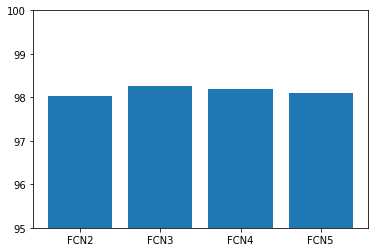

In [ ]:
x = np.arange(4)
fcns = ['FCN2','FCN3','FCN4','FCN5']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, fcns)
plt.ylim((95,100))
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [ ]:
fcn3.save('fcn3_best.hdf5')

In [ ]:
from keras.models import load_model

model = load_model('fcn3_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 0s 2ms/step - loss: 0.0726 - accuracy: 0.9826


[0.07258763909339905, 0.9825999736785889]

---